In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
db = pd.read_csv("Signal.csv", sep = ",")
db.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
corr = db.corr()
corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


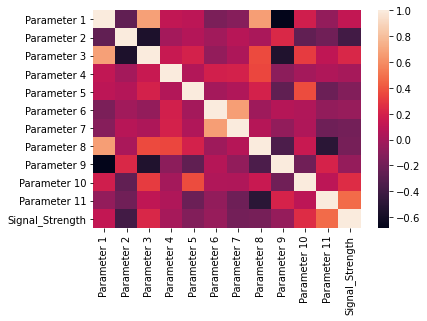

In [4]:
sns.heatmap(corr)
plt.show()

In [5]:
X = db.drop("Signal_Strength", axis = 1)
Y = db["Signal_Strength"]

model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [6]:
print(model.feature_importances_)

[0.07574445 0.0954888  0.08186864 0.07820201 0.07598253 0.07626899
 0.10308744 0.08567481 0.07417384 0.10490629 0.1486022 ]


Parameter 11 is the most effective.

In [7]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=50)

In [8]:
# Scaling training and testing data
X_Train_S = StandardScaler().fit_transform(X_Train)   

X_Test_S = StandardScaler().fit_transform(X_Test) 

In [9]:
# One-hot encoding
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [10]:
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

In [11]:
NN_model_Classifier = Sequential()

#The Input layer. 
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

#The Hidden layers. 
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


#The Output layer. 
NN_model_Classifier.add(Dense(9, kernel_initializer='normal', activation = 'softmax')) 

#Compiling Network.
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 1

In [12]:
# Fit
EPOCH = 350
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/350
6/6 [==============================] - 0s 25ms/step - loss: 0.1974 - accuracy: 0.2788 - val_loss: 0.1973 - val_accuracy: 0.3812
Epoch 2/350
6/6 [==============================] - 0s 4ms/step - loss: 0.1972 - accuracy: 0.3700 - val_loss: 0.1970 - val_accuracy: 0.4000
Epoch 3/350
6/6 [==============================] - 0s 4ms/step - loss: 0.1969 - accuracy: 0.3995 - val_loss: 0.1966 - val_accuracy: 0.4354
Epoch 4/350
6/6 [==============================] - 0s 4ms/step - loss: 0.1964 - accuracy: 0.4584 - val_loss: 0.1959 - val_accuracy: 0.4458
Epoch 5/350
6/6 [==============================] - 0s 4ms/step - loss: 0.1954 - accuracy: 0.4576 - val_loss: 0.1943 - val_accuracy: 0.4354
Epoch 6/350
6/6 [==============================] - 0s 4ms/step - loss: 0.1933 - accuracy: 0.4316 - val_loss: 0.1907 - val_accuracy: 0.3604
Epoch 7/350
6/6 [==============================] - 0s 5ms/step - loss: 0.1882 - accuracy: 0.4155 - val_loss: 0.1820 - val_accuracy: 0.3604
Epoch 8/350
6/6 [=========

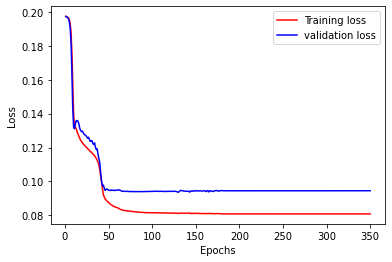

In [13]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Pickling the model

In [15]:
from keras.models import model_from_json
import os

C_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(C_json)

NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved")

Saved
